In [1]:
import matplotlib.pyplot as mp
import numpy as np
import optical
import lightcurves
import sys
#from ipywidgets import widgets
%matplotlib inline 


In [2]:
target = 'NGC7078'
folder = '/Users/jrneeley/CRRP/'+target+'/'
optical_folder = '/Users/jrneeley/CRRP/OpticalCatalogs/'
#folder = '/Users/Jill/CRRP/'+target+'/'
#optical_folder = '/Users/Jill/CRRP/OpticalCatalogs/'

# Read in variables from Clement catalog

In [3]:
dtype1 = np.dtype([('id', 'S10'), ('period', float)])
data = np.loadtxt(folder+target+'-clement.txt', dtype=dtype1, usecols=(0,3))

V118 0.3


Datasets:

      jura  98755 2001-07-13 2001-07-20 k
     Y1005  23905 2010-05-07 2010-05-09 r
    lcogt5  11640 2013-10-27 2013-12-10 b
     M1010   8224 2010-10-25 2010-10-25 g
     int11   5287 2011-08-20 2011-08-22 m
      cf86   5046 1986-07-28 1986-07-31 c
      dahl   4666 2014-06-09 2014-08-10 xkcd:brown
     hrcam   3802 1988-06-30 1989-09-08 xkcd:coral
       pac   3290 1990-06-26 1990-06-26 xkcd:purple
    bond10   2726 1997-09-20 1997-09-23 xkcd:maroon
     mzocc   2689 2000-07-27 2000-07-27 xkcd:olive
   int1208   2337 2012-08-14 2012-08-15 xkcd:tan
   int1605   2217 2016-05-29 2016-05-31 xkcd:grey
     bond8   1697 1996-09-21 1996-09-21 xkcd:teal
     int98   1083 1998-08-21 1998-08-21 xkcd:tomato
       arg    949 1997-06-02 1997-06-02 xkcd:orchid
     wfi16    744 2000-08-04 2000-08-04 xkcd:goldenrod
       dmd    608 1998-06-25 1998-06-25 xkcd:orange
     arg02    603 2002-05-10 2002-05-10 xkcd:khaki
    soar10    601 2010-07-14 2010-07-15 xkcd:darkgreen
   

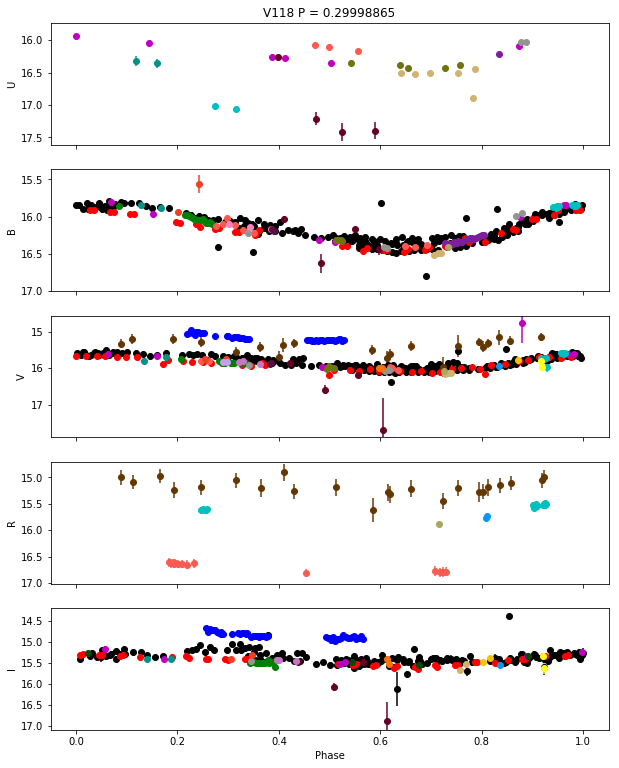

In [4]:
ind=107
print data['id'][ind], data['period'][ind]
lcv_file = optical_folder+target+'lcvs/'+target+data['id'][ind]+'.lcv'
U, B, V, R, I = lightcurves.read_optical_lcv(lcv_file, old=0)

datasets = optical.compile_datasets(optical_folder, target, old=0)
lightcurves.plot_phased_optical_lcv(U, B, V, R, I, 0.29998865, data['id'][ind], datasets)

[ 0.3022993   0.2984815   0.30051899]
[ 0.30232697  0.29848185  0.30051881] [ 0.05255093  0.0475      0.03662649]


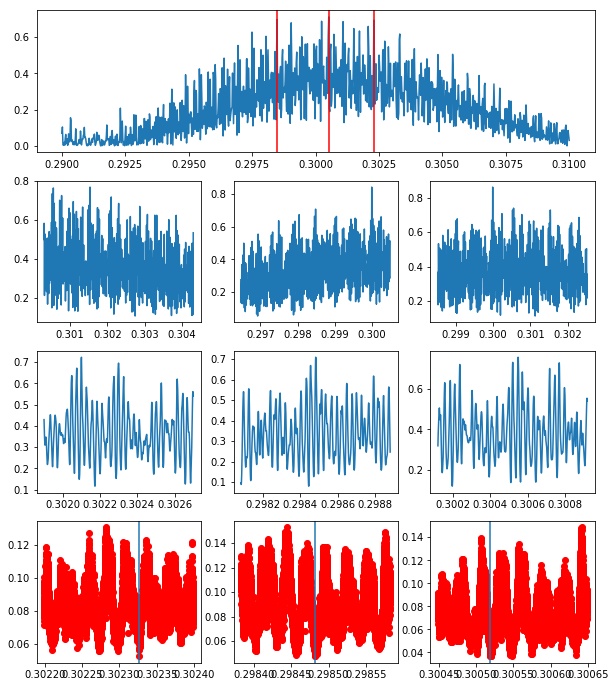

Star  Period  Period_new
V118 0.3 [ 0.30051881]


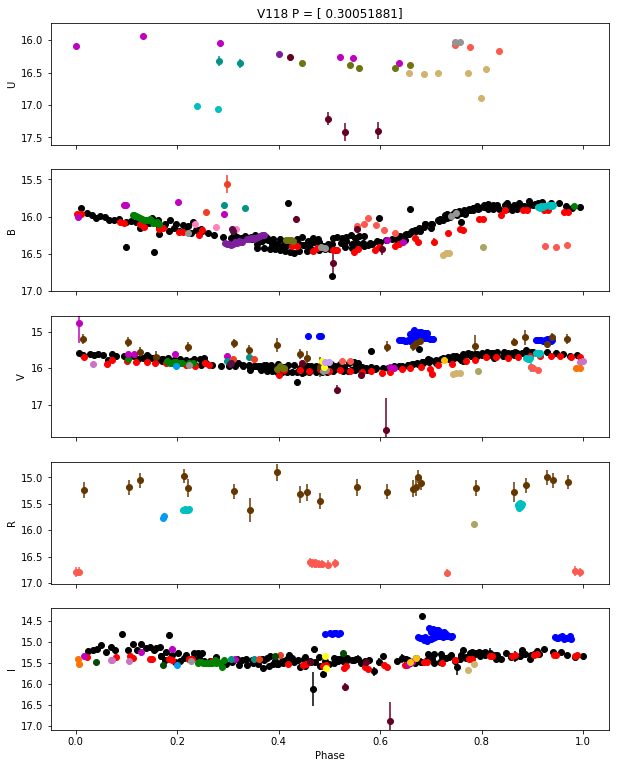

In [5]:
period = lightcurves.period_search_hybrid(B, data['period'][ind], data['id'][ind])
print 'Star  Period  Period_new'
print data['id'][ind], data['period'][ind], period
lightcurves.plot_phased_optical_lcv(U, B, V, R, I, period, data['id'][ind], datasets)

In [ ]:
dtype1 = np.dtype([('id', 'S4'), ('period', float)])
data = np.loadtxt(folder+'periods.txt', dtype=dtype1, usecols=(0,2))
for ind, star in enumerate(data['id']):
    print star
    lightcurves.phase_lcv(folder+'lcvs/matches/'+star+'.lcv', data['period'][ind], 0, save=0, plot=1)

In [1]:
periods = lightcurves.period_search_peter(V, data['period'][ind], data['id'][ind])
for period in periods:
    print period
    lightcurves.plot_phased_optical_lcv(U, B, V, R, I, period, data['id'][ind], datasets)

NameError: name 'lightcurves' is not defined

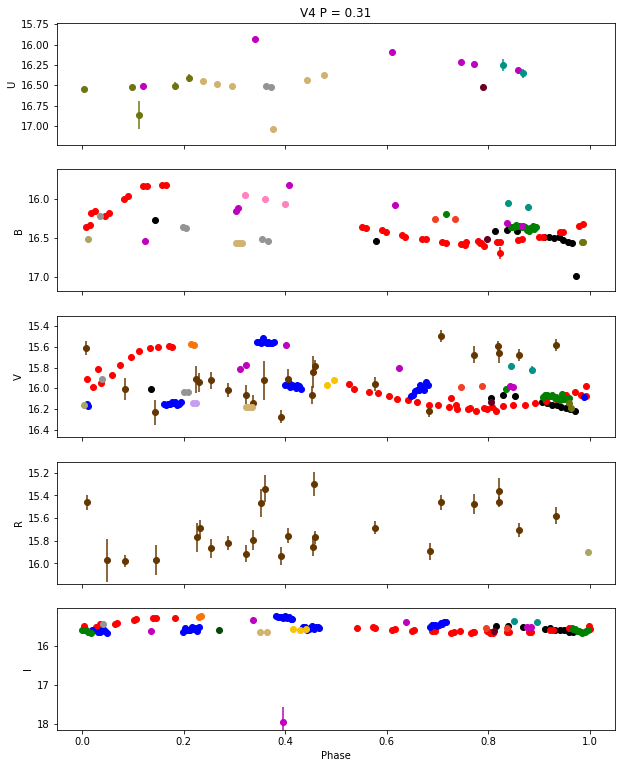

In [7]:
lightcurves.plot_phased_optical_lcv(U, B, V, R, I, 0.31, data['id'][ind], datasets)